#Netflix Case Study- Lakshmidas Kamath

# Problem Statement
### Analyzing the given Netflix Dataset to understand and generate insights on the types of movies and TV Shows present in the database. Categorizing the  content based on Country, Actors, Directors etc.  Also understand how the movies and TV Shows have changed/progressed over the years.

#### 1. Basic Analysis and Information about the Dataset
#### 2. Data cleaning- filling missing values, removing outliers, converting categorical to numerical data, creating bins

In [712]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [713]:
data=pd.read_csv('netflix.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno ...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swi..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noure...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robb..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice C..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Ar...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but une..."


# Basic Analysis

In [714]:
data.shape  # total 8808 rows and 12 columns

(8807, 12)

In [715]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [716]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [717]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [718]:
data.keys()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [719]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [720]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [721]:
data['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [722]:
data['date_added'].value_counts()  # most programs were added on Jan 1st 2020

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: date_added, Length: 1767, dtype: int64

In [723]:
data['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [724]:
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [725]:
data['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [726]:
### Observations

# They are a total of 8808 rows and 12 columns before cleaning the data. 
# Out of 12 columns only one columns contains integer and rest contains objects
# Directors has the higest no of null values followed by Cast and country

### Filling missing Values

In [727]:
values={'director':'unknown', 'cast':'unknown','country':'unknown', 'rating':'unknow', 'duration':0}
data.fillna(value=values, inplace=True)

In [728]:
data.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

### Converting Duration from object to float

In [729]:
data['dur']=data['duration'].str.replace(r'[^0-9,\s]+','', regex=True).astype(float)

### Converting the date_added from object to timestamp

In [730]:
data['date_added']=pd.to_datetime(data['date_added'])

### Removing Outliers

In [731]:
### Removing only higher duration time-- 0.99 quantile
### lower quartile includes the TV Show season- which majority is one.

In [732]:
q_high=data['dur'].quantile(0.999)
data=data[(data['dur']<q_high)]
data.shape

(8795, 13)

In [733]:
data['dur'].sort_values(ascending=False).head()

4573    214.0
807     212.0
2731    209.0
3227    209.0
2632    208.0
Name: dur, dtype: float64

### Creating Category/Bins

In [734]:
# Creating Category/Bins--- DECADE from release year

start_range=[1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030]
cat_name=['20s','30s','40s','50s','60s','70s','80s','90s','2000s','2010s','2020s']
data['decade']=pd.cut(data['release_year'], bins=start_range, labels=cat_name)
pd.set_option('max_colwidth',10)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,dur,decade
0,s1,Movie,Dick J...,Kirste...,unknown,United...,2021-09-25,2020,PG-13,90 min,Docume...,As her...,90.0,2010s
1,s2,TV Show,Blood ...,unknown,Ama Qa...,South ...,2021-09-24,2021,TV-MA,2 Seasons,Intern...,After ...,2.0,2020s
2,s3,TV Show,Ganglands,Julien...,Sami B...,unknown,2021-09-24,2021,TV-MA,1 Season,Crime ...,To pro...,1.0,2020s
3,s4,TV Show,Jailbi...,unknown,unknown,unknown,2021-09-24,2021,TV-MA,1 Season,Docuse...,"Feuds,...",1.0,2020s
4,s5,TV Show,Kota F...,unknown,Mayur ...,India,2021-09-24,2021,TV-MA,2 Seasons,Intern...,In a c...,2.0,2020s


### Seperating Movie and TV Show Data

In [735]:
movie_data=data.loc[(data['type']=='Movie')]
tvshow_data=data.loc[(data['type']=='TV Show')]

In [736]:
# year the first and last movie released

movie_data['release_year'].aggregate(['min','max'])

min    1942
max    2021
Name: release_year, dtype: int64

In [737]:
movie_data.loc[movie_data['release_year']==1942]  # oldest movie on Netfix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,dur,decade
7790,s7791,Movie,Prelud...,Frank ...,unknown,United...,2017-03-31,1942,TV-14,52 min,Classi...,Frank ...,52.0,40s
8205,s8206,Movie,The Ba...,John Ford,Henry ...,United...,2017-03-31,1942,TV-14,18 min,Classi...,Direct...,18.0,40s


In [738]:
#length of smallest and biggest movie in minutes

movie_data['dur'].aggregate(['min','max'])

min      3.0
max    214.0
Name: dur, dtype: float64

In [739]:
data.loc[data['duration']=='312 min']   ## longest movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,dur,decade


In [740]:
movie_data.loc[movie_data['dur']==3]   ## shortest movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,dur,decade
3777,s3778,Movie,Silent,Limber...,unknown,United...,2019-06-04,2014,TV-Y,3 min,Childr...,"""Silen...",3.0,2010s


In [741]:
# #length of smallest and biggest TV Show in seasons

tvshow_data['dur'].aggregate(['min','max'])

min     1.0
max    17.0
Name: dur, dtype: float64

In [742]:
tvshow_data.loc[tvshow_data['dur']==17]  ## Longest running TV Show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,dur,decade
548,s549,TV Show,Grey's...,unknown,Ellen ...,United...,2021-07-03,2020,TV-14,17 Sea...,Romant...,Intern...,17.0,2010s


In [743]:
tvshow_data['release_year'].aggregate(['min','max'])

min    1925
max    2021
Name: release_year, dtype: int64

In [744]:
tvshow_data.loc[tvshow_data['release_year']==1925]  # oldest TV Show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,dur,decade
4250,s4251,TV Show,Pionee...,unknown,unknown,unknown,2018-12-30,1925,TV-14,1 Season,TV Shows,This c...,1.0,20s


In [745]:
movie_data['dur'].mean()  # avg duration of movies

99.36100670044125

In [746]:
tvshow_data['dur'].mean() # avg duration of TV Shows

1.764947683109118

### Analysis of movies

In [747]:
# movies released each year

movie_data['release_year'].value_counts().reset_index().head(10).sort_values('index', ascending=False)

,index,release_year
6,2021,276
4,2020,517
3,2019,633
1,2018,766
0,2017,766
2,2016,658
5,2015,397
7,2014,264
8,2013,225
9,2012,173


In [748]:
# no of movies in each decade

movie_data['decade'].value_counts().reset_index().sort_values('index', ascending=False)

,index,decade
2,2020s,276
0,2010s,4544
1,2000s,796
3,90s,255
4,80s,127
5,70s,73
6,60s,20
7,50s,15
8,40s,13
10,30s,0


<AxesSubplot:xlabel='decade', ylabel='Count'>

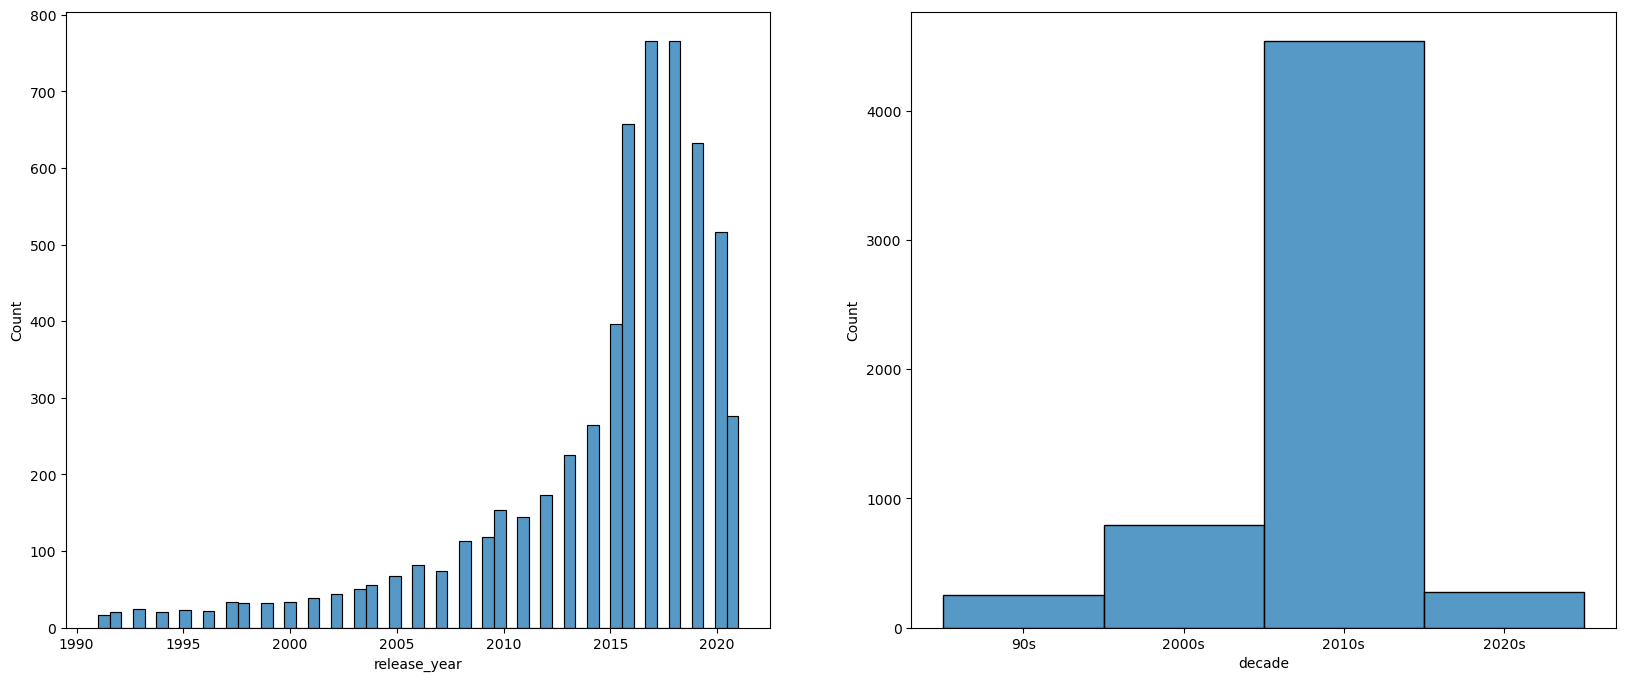

In [749]:
# Movies in Last 30 years- 1990 to present

last30y_movie=movie_data.loc[movie_data['release_year']>=1991]
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.histplot(last30y_movie['release_year'])
plt.subplot(1,2,2)
sns.histplot(last30y_movie['decade'])   

<AxesSubplot:xlabel='decade', ylabel='Count'>

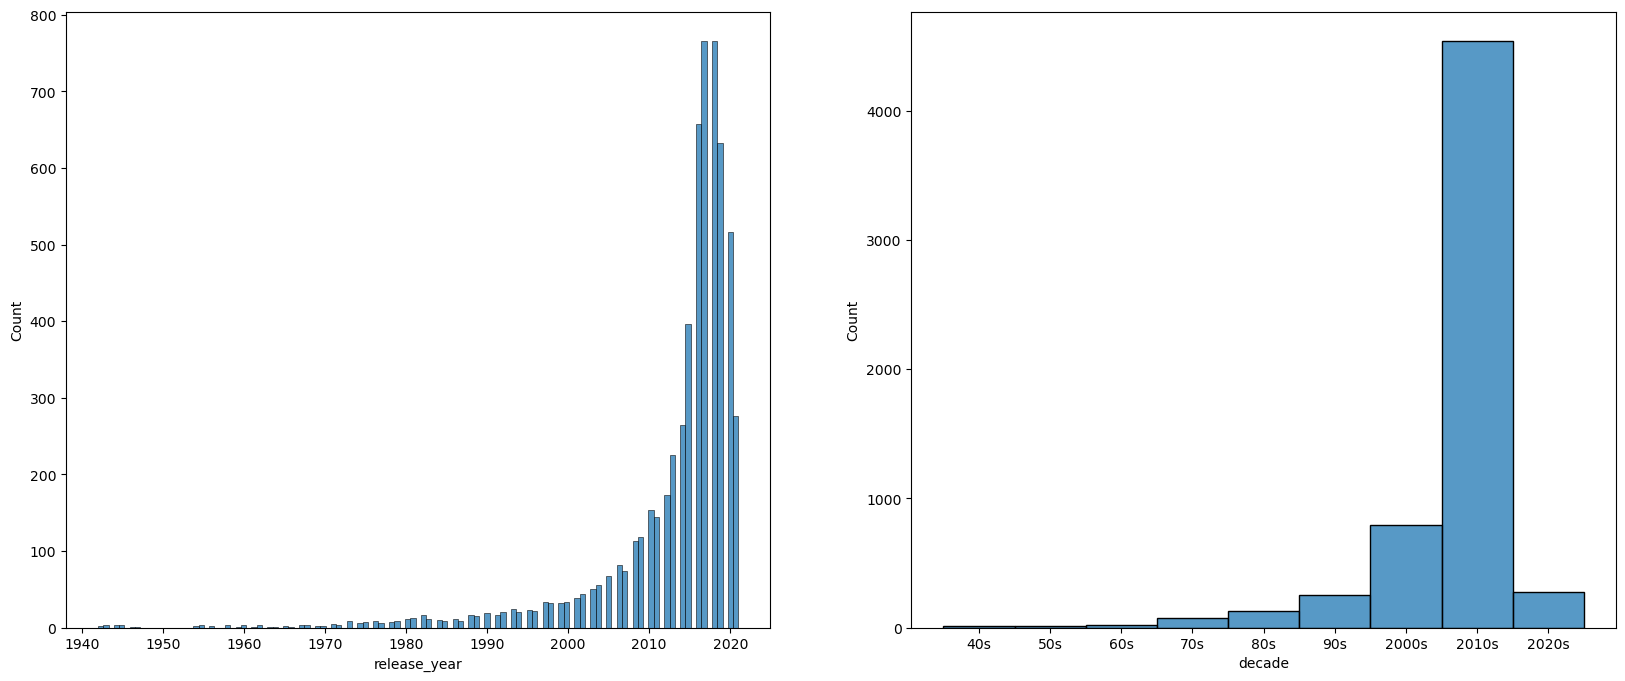

In [750]:
# Complete movies analysis

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.histplot(movie_data['release_year'])  # left skewed distribution
plt.subplot(1,2,2)
sns.histplot(x=movie_data['decade'])    # left skewed distribution

In [751]:
movie_30y=movie_data.loc[movie_data['release_year']>=1990]
movie_20y=movie_data.loc[movie_data['release_year']>=2000]
avg_dur_30y=movie_30y['dur'].mean()
avg_dur_20y=movie_20y['dur'].mean()

In [752]:
# average difference in run time of movies releases in last 30 year and last 20 years

dur_diff=avg_dur_30y-avg_dur_20y
dur_diff

0.6404598557191719

In [753]:
# average duration of movies by decade

a=movie_data.groupby('decade')['dur'].mean().reset_index().dropna()
a

,decade,dur
2,40s,51.384615
3,50s,116.80...
4,60s,139.45...
5,70s,116.43...
6,80s,113.29...
7,90s,113.27...
8,2000s,110.54...
9,2010s,96.077025
10,2020s,95.804348


<AxesSubplot:xlabel='decade', ylabel='dur'>

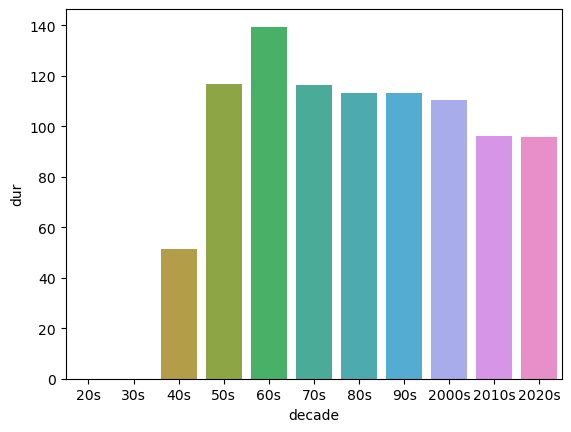

In [754]:
sns.barplot(y=a['dur'], x=a['decade'])

In [755]:
### year difference between actual release and Netflix release

year_diff=movie_data['date_added'].dt.year-movie_data['release_year']
year_diff=year_diff.sort_values(ascending=False)
year_diff

8205    75
7790    75
8763    74
8660    74
8739    74
        ..
5733     0
5734     0
5736     0
7063    -1
5394    -1
Length: 6119, dtype: int64

<AxesSubplot:ylabel='Count'>

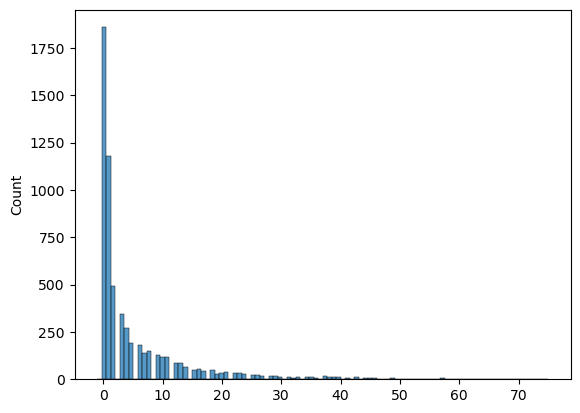

In [756]:
sns.histplot(year_diff)   # - Mojority of the movies on Netflix where added the same year they were released.-2021

In [757]:
#Insights

# -oldest Movie on Netflix are Prelude to War & The Battle of Midway from year 1942
# - Shortest movie and Longest Movies are Silent(3 mins) and Black Mirror: Bandersnatch(312 mins)

# -The numnber of movies released each year had increased very much over the decades.
# - Almost 2/3rd of the movies on Netflix are from 2010s decade.
# - There are less than 200 movies on Netflix which are older than 1970s.
# - When compared to 90s and 2000s, there are almost 3 times more movies from 2000s than 90s 
# - ANd bewteen 90s and 2010s, there are 17 times more movies from 2010s compared to 90s.
# - Mojority of the movies on Netflix where added the same year they were released.

# - The average duration of recent movies on Netflix is lesser compared to the order movies.

### Comparison of TV Shows and Movies

In [758]:
data['type'].value_counts()

Movie      6119
TV Show    2676
Name: type, dtype: int64

### Day on which most TV Shows were released

In [759]:
tv_day=tvshow_data['date_added'].dt.day_name()
tv_day.value_counts().head(1)                   ## On Netflix most TV Shows were released on Friday

Friday    932
Name: date_added, dtype: int64

In [760]:
m_day=movie_data['date_added'].dt.day_name()
m_day.value_counts().head(1)                     ## On Netflix most movies were released on Friday

Friday    1564
Name: date_added, dtype: int64

In [761]:
m_count=movie_data['release_year'].value_counts()
x1=m_count.index
y1=m_count
tv_count=tvshow_data['release_year'].value_counts()
x2=tv_count.index
y2=tv_count

In [2]:
plt.figure(figsize=(25,12))
plt.subplot(2,3,2)
sns.countplot(data['type'])
plt.subplot(2,3,1)
sns.lineplot(x=x1, y=y1, color='blue')
sns.lineplot(x=x2,y=y2, color='orange')                                           
plt.subplot(2,3,3)
sns.countplot(data=data,x='country',hue='type', order=data['country'].value_counts().head(5).index)                                                     
plt.subplot(2,3,4)
sns.boxplot(data=movie_data, x='decade', y='dur', color='blue')                                                   
plt.subplot(2,3,5)
sns.boxplot(data=tvshow_data, x='decade', y='dur', color='orange')        
plt.subplot(2,3,6)
sns.countplot(data=data, x='decade', hue='type')

NameError: name 'plt' is not defined

In [763]:
# Insight

# - Netflix Clearly has more no of movies than TV Shows- more than twice
# - The mojority of TV Shows and Movies on Netflix are from 20th Century, specifically 2010s.
# - Among the top countries only japan and UK are having more TV Shows on Netflix compared to Movies.
# - The average of duration for movies on Netflix is around 100 mins where for TV Shows its 1-2 seasons.
# - There are a lot of ouliers for each deacde in terms of duration, expecially in movies from 2000s, 2010s.
# - On Netflix, most of TV Shows and Movies were released on Friday

## Analysis of different genres against Directors

### Top 10 directors with most movies

In [764]:
director=data.loc[data['director']!='unknown']
director['director'].value_counts().reset_index()[:10]

,index,director
0,Rajiv ...,19
1,Raúl C...,18
2,Marcus...,16
3,Suhas ...,16
4,Jay Karas,14
5,Cathy ...,13
6,Jay Ch...,12
7,Yousse...,12
8,Martin...,12
9,Steven...,11


### Each directors year of first and last movie

In [765]:
director.groupby('director')['release_year'].agg({'min','max'}).reset_index()

,director,min,max
0,A. L. ...,2016,2019
1,A. Raa...,2020,2020
2,A. Salaam,1975,1975
3,A.R. M...,2017,2018
4,Aadish...,2018,2018
...,...,...,...
4519,Çagan ...,2005,2005
4520,Ísold ...,2018,2018
4521,Óskar ...,2017,2017
4522,Ömer F...,2004,2011


In [766]:
data['listed_in'].value_counts()

Dramas, International Movies                             362
Documentaries                                            358
Stand-Up Comedy                                          334
Comedies, Dramas, International Movies                   271
Dramas, Independent Movies, International Movies         252
                                                        ... 
Crime TV Shows, Kids' TV                                   1
Horror Movies, International Movies, Sci-Fi & Fantasy      1
TV Comedies, TV Mysteries                                  1
British TV Shows, Docuseries, TV Comedies                  1
Cult Movies, Dramas, Thrillers                             1
Name: listed_in, Length: 514, dtype: int64

In [767]:
# Unnesting of the columns listed_in


listed_data=data.assign(listed_in=data['listed_in'].str.split(','))
listed_data=listed_data.explode('listed_in')
pd.set_option('max_colwidth',30)
listed_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,dur,decade
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,As her father nears the en...,90.0,2010s
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, G...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,After crossing paths at a ...,2.0,2020s
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, G...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,After crossing paths at a ...,2.0,2020s
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, G...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,After crossing paths at a ...,2.0,2020s
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoa...",unknown,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from...,1.0,2020s


In [768]:
### Top 10 popular Geners

In [769]:
listed_data['listed_in'].value_counts().reset_index()[:10]

,index,listed_in
0,International Movies,2617
1,Dramas,1598
2,Comedies,1206
3,Action & Adventure,859
4,Documentaries,828
5,Dramas,822
6,International TV Shows,774
7,Independent Movies,736
8,TV Dramas,696
9,Romantic Movies,612


In [770]:
director_type=listed_data[['director','listed_in']]
director_type=director_type.loc[director_type['director']!='unknown']
director_type     

# Directors and the Geners they have directed

,director,listed_in
0,Kirsten Johnson,Documentaries
2,Julien Leclercq,Crime TV Shows
2,Julien Leclercq,International TV Shows
2,Julien Leclercq,TV Action & Adventure
5,Mike Flanagan,TV Dramas
...,...,...
8805,Peter Hewitt,Children & Family Movies
8805,Peter Hewitt,Comedies
8806,Mozez Singh,Dramas
8806,Mozez Singh,International Movies


### Directors and the list of Geners they have directed movies

In [771]:
pd.set_option('max_colwidth',100)
director_type=director_type.drop_duplicates()     # removing duplicates
directors_type_list=director_type.groupby('director').agg({'listed_in':list}).reset_index()
directors_type_list

,director,listed_in
0,A. L. Vijay,"[Comedies, Dramas, International Movies, Sci-Fi & Fantasy]"
1,A. Raajdheep,"[Dramas, International Movies]"
2,A. Salaam,"[Action & Adventure, International Movies, Music & Musicals]"
3,A.R. Murugadoss,"[Action & Adventure, Dramas, International Movies]"
4,Aadish Keluskar,"[Dramas, Independent Movies, International Movies]"
...,...,...
4519,Çagan Irmak,"[Dramas, International Movies]"
4520,Ísold Uggadóttir,"[Dramas, Independent Movies, International Movies]"
4521,Óskar Thór Axelsson,"[Horror Movies, International Movies]"
4522,Ömer Faruk Sorak,"[Action & Adventure, Comedies, International Movies, Dramas, Romantic Movies]"


### count of movies listed in each type of categories

In [772]:
a=listed_data['listed_in'].value_counts().reset_index()
a

,index,listed_in
0,International Movies,2617
1,Dramas,1598
2,Comedies,1206
3,Action & Adventure,859
4,Documentaries,828
...,...,...
68,Romantic Movies,3
69,Spanish-Language TV Shows,2
70,LGBTQ Movies,1
71,TV Sci-Fi & Fantasy,1


<AxesSubplot:xlabel='index', ylabel='listed_in'>

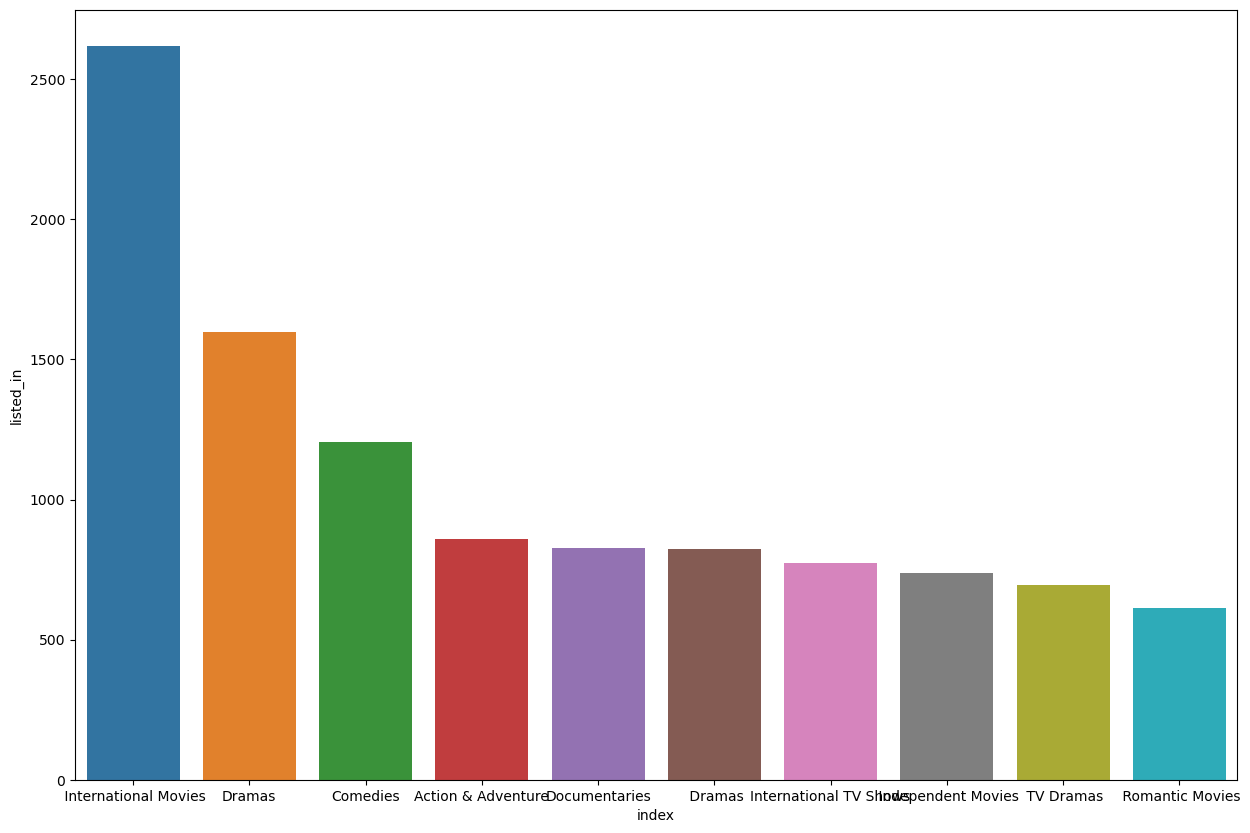

In [773]:
plt.figure(figsize=(15,10))
sns.barplot(data=a[:10], x='index', y='listed_in')

In [774]:
# Insight

# - There are a total of 4524 directors and 73 different genres in the dataset
# - Most of the movies are listed in 'International Movies' followed by Dramas and comdey.
# - Rajiv Chilaka has directed most movies in the dataset-19 movies.
# - Very few programs from MoviesLGBTQ, Sci-Fi and Fantasy, Sports Movies categories.

## Analysis of Cast

In [775]:
# unnesting of cast of each movie

d1=data.assign(cast=data['cast'].str.split(','))
d1=d1.explode('cast')
pd.set_option('max_colwidth',30)
d1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,dur,decade
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,As her father nears the en...,90.0,2010s
1,s2,TV Show,Blood & Water,unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV...",After crossing paths at a ...,2.0,2020s
1,s2,TV Show,Blood & Water,unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV...",After crossing paths at a ...,2.0,2020s
1,s2,TV Show,Blood & Water,unknown,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV...",After crossing paths at a ...,2.0,2020s
1,s2,TV Show,Blood & Water,unknown,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV...",After crossing paths at a ...,2.0,2020s


### Top 10 actors with highest Movies/TV Shows

In [776]:
d1=d1.loc[d1['cast']!='unknown']

cast=d1['cast'].value_counts().reset_index()
cast[:10]

,index,cast
0,Anupam Kher,39
1,Rupa Bhimani,31
2,Takahiro Sakurai,30
3,Julie Tejwani,28
4,Om Puri,27
5,Shah Rukh Khan,26
6,Rajesh Kava,26
7,Boman Irani,25
8,Paresh Rawal,25
9,Yuki Kaji,25


In [777]:
d1.groupby('cast').ngroups

39267

### Each actors year of first and last movie/tv show

In [778]:
d1.groupby('cast')['release_year'].agg({'min','max'}).reset_index()

,cast,min,max
0,Jr.,2017,2020
1,"""Riley"" Lakdhar Dridi",2019,2019
2,'Najite Dede,2016,2016
3,2 Chainz,2018,2018
4,2Mex,2008,2008
...,...,...,...
39262,İbrahim Büyükak,2016,2016
39263,İbrahim Çelikkol,2016,2016
39264,Şahin Irmak,2018,2018
39265,Şükrü Özyıldız,2014,2014


In [779]:
movie_d1=d1.loc[d1['type']=='Movie']    # movie data from Unnested cast data
tv_d1=d1.loc[d1['type']=='TV Show']     # TV show data from unnested cast data

In [780]:
a=movie_d1['cast'].value_counts().reset_index()     
b=tv_d1['cast'].value_counts().reset_index()

### actors who have done both Movies and TV shows

In [781]:
merge_d=a.merge(b,how='inner')
merge_d

,index,cast
0,Brian Drummond,8
1,Michela Luci,7
2,Kazuhiko Inoue,7
3,Anna Claire Bartlam,6
4,Lena Headey,5
...,...,...
1829,Cameron J. Wright,1
1830,Talia Jackson,1
1831,César Mello,1
1832,Lynn,1


In [782]:
#unnesting of cast and listed_in columns

new_d1=d1.assign(listed_in=d1['listed_in'].str.split(','))
new_d1=new_d1.explode('listed_in')
pd.set_option('max_colwidth',30)
new_d1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,dur,decade
1,s2,TV Show,Blood & Water,unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,After crossing paths at a ...,2.0,2020s
1,s2,TV Show,Blood & Water,unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,After crossing paths at a ...,2.0,2020s
1,s2,TV Show,Blood & Water,unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,After crossing paths at a ...,2.0,2020s
1,s2,TV Show,Blood & Water,unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,After crossing paths at a ...,2.0,2020s
1,s2,TV Show,Blood & Water,unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,After crossing paths at a ...,2.0,2020s


In [783]:
new_d1=new_d1.dropna()
new_d1=new_d1.drop_duplicates()
cast_listed_data=new_d1[['cast','listed_in']]
pd.set_option('max_colwidth',30)
cast_listed_data

,cast,listed_in
1,Ama Qamata,International TV Shows
1,Ama Qamata,TV Dramas
1,Ama Qamata,TV Mysteries
1,Khosi Ngema,International TV Shows
1,Khosi Ngema,TV Dramas
...,...,...
8806,Anita Shabdish,International Movies
8806,Anita Shabdish,Music & Musicals
8806,Chittaranjan Tripathy,Dramas
8806,Chittaranjan Tripathy,International Movies


### Cast and the geners they have acted in

In [784]:
listed_in_of_cast=cast_listed_data.groupby('cast').agg({'listed_in':list})
pd.set_option('max_colwidth',100)
listed_in_of_cast

,listed_in
cast,
Jr.,"[Comedies, TV Dramas]"
"""Riley"" Lakdhar Dridi","[Comedies, Dramas, International Movies]"
'Najite Dede,"[Comedies, International Movies, Romantic Movies]"
2 Chainz,[Docuseries]
2Mex,"[Documentaries, Music & Musicals]"
...,...
İbrahim Büyükak,"[Comedies, International Movies]"
İbrahim Çelikkol,"[International TV Shows, Romantic TV Shows, TV Dramas]"
Şahin Irmak,"[Comedies, International Movies, Romantic Movies]"


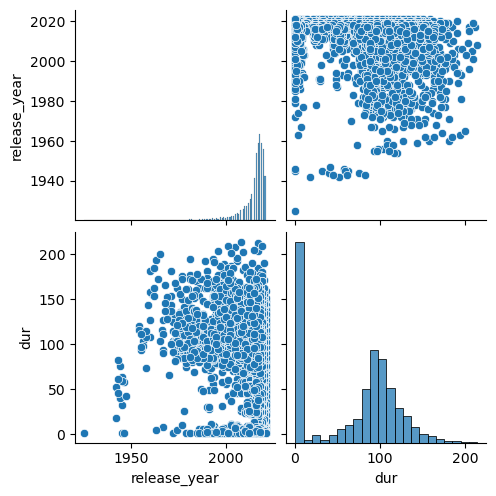

In [785]:
sns.pairplot(data=data)

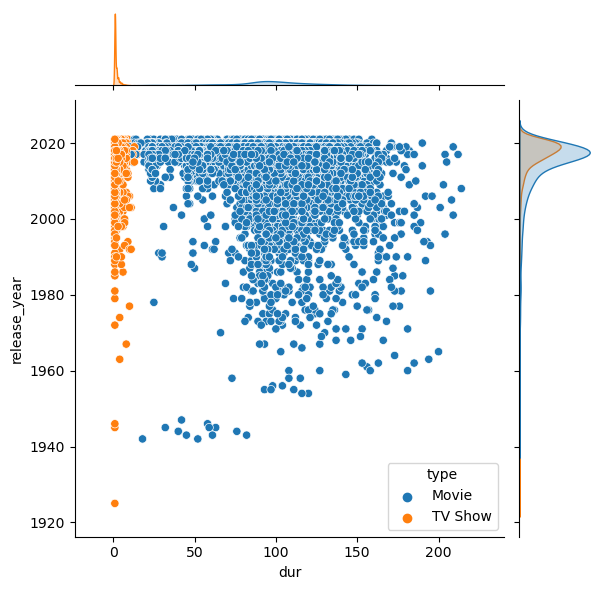

In [786]:
sns.jointplot(data=data, x='dur', y='release_year', hue='type')

In [787]:
#Insight

# - Anupam Kher has the highest number movies on netflix as a cast- 39 movies
# - There are a total of 39267 different actors in the dataset
# - Out of total 1834 actors have worked in both Movies and TV Shows
#- From scatterplot it is clearl that the no of programs released in years before 1980s is very few compared to recent years.

## Analysis of country vs Genre

In [788]:
# Unnesting of country and listed_in, removing duplicates and NAn

country=listed_data.assign(country=data['country'].str.split(','))
country=country.explode('country')
country_type=country[['country', 'listed_in']]
country_type=country_type.loc[country_type['country']!='unknown']
country_type=country_type.drop_duplicates()

In [789]:
pd.set_option('max_colwidth',100)
country_type.groupby('country').agg({'listed_in':list}).reset_index()

,country,listed_in
0,,"[International TV Shows, TV Dramas, Dramas, Independent Movies, International Movies, Documen..."
1,Afghanistan,"[Documentaries, International Movies]"
2,Albania,"[Dramas, International Movies]"
3,Algeria,"[Dramas, Independent Movies, International Movies, Classic Movies, Dramas]"
4,Angola,"[Action & Adventure, International Movies]"
...,...,...
192,Uruguay,"[Docuseries, International TV Shows, Science & Nature TV, Documentaries, International Movies..."
193,Venezuela,"[Documentaries, International Movies]"
194,Vietnam,"[Dramas, International Movies, Romantic Movies, Documentaries, Music & Musicals, Action & Adv..."
195,West Germany,"[Documentaries, International Movies]"


## Checking Correlation

In [790]:
data.corr()

,release_year,dur
release_year,1.000000,-0.243113
dur,-0.243113,1.000000


<AxesSubplot:>

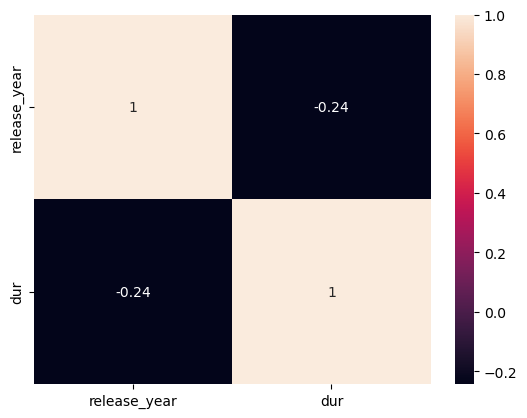

In [791]:
sns.heatmap(data.corr(), annot=True)

In [792]:
# Insight

# - Highly negative correlation b/w release_year and duration of the movie/ tv show

### Summary

In [793]:
# Final Insights

# - Almost 2/3rd of the movies on Netflix are from 2010s decade.
# - There are less than 200 movies on Netflix which are older than 1970s.
# - Netflix has more no of movies than TV Shows- more than twice, even though numbers have increased in recent years.
# - Among the top countries only japan and UK are having more TV Shows on Netflix compared to Movies.
# - The average of duration for movies on Netflix is around 100 mins where for TV Shows its 1-2 seasons.
# - There are a lot of ouliers for each deacde in terms of duration, expecially in movies from 2000s, 2010s.
# - On Netflix, most of TV Shows and Movies were released on Friday
# - There are a total of 4524 directors and 73 different genres in the dataset
# - Most of the movies are listed in 'International Movies' followed by Dramas and comdey.
# - Very few programs from MoviesLGBTQ, Sci-Fi and Fantasy, Sports Movies categories.
# - There are a total of 39267 different actors in the dataset and 1834 actors have worked in both Movies and TV Shows


In [794]:
# Recommendation

#- Majority of Movies and Shows are from 21st century. Should increase the number of programs from previous century as well for regular streaming.
#- The number of TV Shows compared to Movies on Netflix is very low. Increasing TV Shows may attract more audience and may increase viewers visit frequency.
#- Most of the TV Shows are having 1 or 2 seasons. This might be due the drop in viwership or ratings. Should have a deeper study why this is happening.
#- US and India contributes to almost half of their Dataset. Should increase programs from other country and languages.
#- More number of movies in MoviesLGBTQ, Sci-Fi and Fantasy, Sports Movies and smaller categories should be added as there are only 1 from each category.